# Classification Accuracy

In [3]:
import pandas as pd
location = 'pima-indians-diabetes.csv'
# col_names = ['pregnant','glucose','bp','skin_thickness','insulin','bmi','predigree','age','label']
# diabetes = pd.read_csv(location, header=None, names=col_names)
pima = pd.read_csv(location)

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


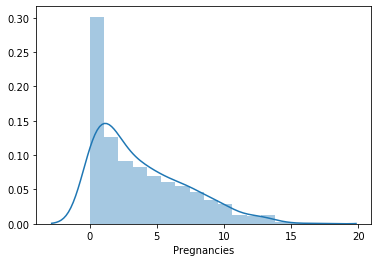

In [8]:
# import numpy as np
import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy import stats

sns.distplot(pima.Pregnancies);

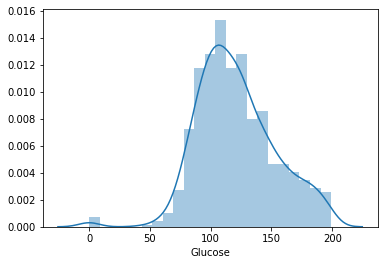

In [9]:
sns.distplot(pima.Glucose)

## Q. Can we predict the diabetes status of a patient given their health measurements?

In [10]:
feature_cols = ['Pregnancies','Insulin','BMI','Age']
X = pima[feature_cols]
y = pima.Outcome

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=10)

In [12]:
# train a logistic regression model on the training sets
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = logreg.predict(X_test)

## Classification accuracy: percentage of correct predictions

In [14]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.640625

Anytime classification accuracy used as a evaluation metrics, it is import to compare with Null accuracy

## Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [15]:
y_test.value_counts()

0    121
1     71
Name: Outcome, dtype: int64

In [16]:
# % of ones
y_test.mean()

0.3697916666666667

In [17]:
# % of zeros
1 - y_test.mean() 

0.6302083333333333

In [18]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1-y_test.mean())

0.6302083333333333

In [19]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.630208
Name: Outcome, dtype: float64

In [20]:
print ('True: ', y_test.values[0:25])
print ('Pred: ', y_pred[0:25])

True:  [0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0]
Pred:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1]


It looks like if y = 0, the model predict 0 correctly, but the model can't the correct value predict if y = 1

## Conclusion:
    1. Classification accuracy is the easiest classification metric to understand.
    2. But, it does not tell you the underlying distribution of response values.
    3. It does not tell you what "types" of errors your classifier is making.

## Confusion Matrix

Table that describes the performance of a classification model

In [21]:
# !First argument is true values, second argument is predicted values.
metrics.confusion_matrix(y_test, y_pred)

array([[101,  20],
       [ 49,  22]])

![Small confusion matrix](image/[fileName].png)

In [22]:
confusion = metrics.confusion_matrix(y_test, y_pred)

In [23]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

## Metrics computed from a confusion matrix
### Classification Accuracy: Overall, how often is the classifier correct? 

In [24]:
(TP + TN)/(TP + TN + FP + FN)

0.640625

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.640625

## Classification Error: Overall ow often is the classifier correct?
    known as "Misclassification Rate"

In [26]:
(FP + FN)/(TP + TN + FP + FN)

0.359375

In [27]:
1-metrics.accuracy_score(y_test, y_pred)

0.359375

## Recall / Sensitivity: When the actual value is positive, how often is the prediction correct?
    known as "True Positive Rate" or "Recall"

In [54]:
recall = TP / float(TP + FN)
recall

0.30985915492957744

In [29]:
metrics.recall_score(y_test, y_pred)

0.30985915492957744

## Specificicty: When the actual value is negative, how often is the prediction correct?
    How "specific" or "selective" is the classifier in predicting positive instances?

In [30]:
TN / float(TN + FP)

0.8347107438016529

## False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [31]:
FP/float(TN+FP)

0.1652892561983471

## Precision: When a positive value is predicted, how often is the prediction correct?

In [53]:
precision = TP/(TP+FP)
precision

0.5238095238095238

In [59]:
f1_score = 2*(precision*recall)/(precision+recall)
f1_score

0.3893805309734514

In [61]:
print(metrics.classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.67      0.83      0.75       121
           1       0.52      0.31      0.39        71

    accuracy                           0.64       192
   macro avg       0.60      0.57      0.57       192
weighted avg       0.62      0.64      0.61       192



# Adjusting the classification threshold

In [33]:
logreg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
logreg.predict_proba(X_test)[:10, :]

array([[0.64554308, 0.35445692],
       [0.60294328, 0.39705672],
       [0.60620022, 0.39379978],
       [0.90021344, 0.09978656],
       [0.78686165, 0.21313835],
       [0.8986779 , 0.1013221 ],
       [0.86322567, 0.13677433],
       [0.56774557, 0.43225443],
       [0.76188225, 0.23811775],
       [0.64119991, 0.35880009]])

In [35]:
logreg.predict_proba(X_test)[:10, 1]

array([0.35445692, 0.39705672, 0.39379978, 0.09978656, 0.21313835,
       0.1013221 , 0.13677433, 0.43225443, 0.23811775, 0.35880009])

In [36]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'Frequency')

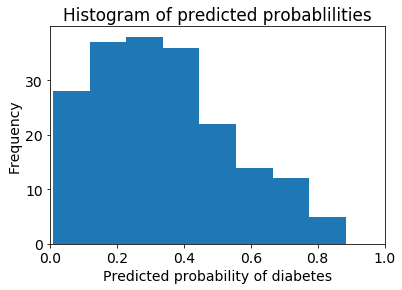

In [38]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probablilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [39]:
from sklearn.preprocessing import binarize
y_pred_class = binarize(y_pred_prob.reshape(1, -1), threshold=0.3)[0]

In [40]:
y_pred_prob[:10]

array([0.35445692, 0.39705672, 0.39379978, 0.09978656, 0.21313835,
       0.1013221 , 0.13677433, 0.43225443, 0.23811775, 0.35880009])

In [41]:
y_pred_class[:10]

array([1., 1., 1., 0., 0., 0., 0., 1., 0., 1.])

In [42]:
confusion

array([[101,  20],
       [ 49,  22]])

In [43]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[73, 48],
       [16, 55]])

In [44]:
# Sensitivity has increased(used to be 0.30)
46/float(46+46)

0.5

In [45]:
# Specificity has decreased(used to be 0.83)
80/float(80+50)

0.6153846153846154

## Conclusion:
    1. Sensitivity & Specificity -> inverse relationship
    2. Threshold  of .5 is used by default(for binary problem) to convert predicted probabilities into class predictions.
    3. Threshold can be adjusted to increase sensitivity or specificity. Used the one right for your business objective

# Receiver operating characteristic(ROC) curves and area under the curve (AUC)

Q. Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, 
without actually changing the threshold?

A: Plot the ROC curve!

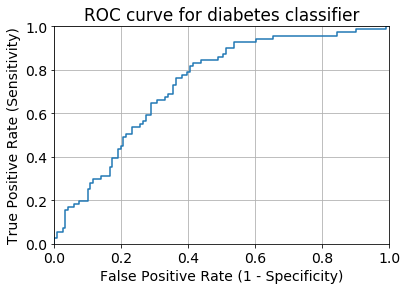

In [46]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [47]:
def evaluate_threshold(threshold):
    print ('Sensitivity(Recall): ', tpr[thresholds > threshold][-1])
    print ('Specificity: ', 1- fpr[thresholds > threshold][-1])

In [48]:
evaluate_threshold(.5)

Sensitivity(Recall):  0.30985915492957744
Specificity:  0.8347107438016529


In [49]:
evaluate_threshold(.3)

Sensitivity(Recall):  0.7746478873239436
Specificity:  0.6033057851239669


## AUC is the percentage of the ROC plot that is underneath the curve:

   - AUC is useful as a single number summary of classifier performance.
   - If you randomly chose one positive and one negative observation, AUC represents the likelihood 
    that your classifier will assign a higher predicted probability to the positive observation
   - AUC is useful even when there is high class imbalance (unlike classification accuracy)

In [50]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
metrics.roc_auc_score(y_test, y_pred_prob)

0.7341403794668839

In [51]:
# cross-validated AUC
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc') # cv: default 5-fold cross validation
cv_scores

array([0.75851852, 0.77185185, 0.80518519, 0.6237037 , 0.70814815,
       0.74814815, 0.73185185, 0.80074074, 0.73846154, 0.73846154])

In [52]:
cv_scores.mean()

0.7425071225071225

## Confusion Matrix Advantages:
    
   - Allow you to calculate a variety of metrics
   - Useful for multi-class problems (more than two response classes)

## ROC/AUC Advantages

   - Doesn't require you to set a classification threshold
   - Still useful when there is high class imbalance

## This content is from https://www.youtube.com/watch?v=85dtiMz9tSo

## Resources (copied from the youtube link)

Simple guide to confusion matrix terminology: https://www.dataschool.io/simple-guid...
Intuitive sensitivity and specificity: https://www.youtube.com/watch?v=U4_3f...
The tradeoff between sensitivity and specificity: https://www.youtube.com/watch?v=vtYDy...
How to calculate "expected value" from a confusion matrix: https://github.com/podopie/DAT18NYC/b...
Classification threshold graphic: https://media.amazonwebservices.com/b...

== ROC/AUC RESOURCES ==
ROC Curves and Area Under the Curve: https://www.youtube.com/watch?v=OAl6e...
ROC visualization: http://www.navan.name/roc/
ROC Curves: https://www.youtube.com/watch?v=21Igj...
An introduction to ROC analysis: http://people.inf.elte.hu/kiss/13dwhd...
Comparing different feature sets: http://research.microsoft.com/pubs/20...
Comparing different classifiers: http://www.cse.ust.hk/nevinZhangGroup...

== OTHER RESOURCES ==
scikit-learn documentation on model evaluation: http://scikit-learn.org/stable/module...
Comparing model evaluation procedures and metrics: https://github.com/justmarkham/DAT8/b...
Counterfactual evaluation of machine learning models: https://www.youtube.com/watch?v=QWCSx...